In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\envs\tensorflow_2\lib\site-

In [3]:
# resize all the images to this
IMAGE_SIZE = [224,224]
train_path ='C:/Users/Admin/Desktop/lung disease/train'
test_path ='C:/Users/Admin/Desktop/lung disease/test'

In [4]:
# Import the Vgg 16  library as shown bellow and add preprocessing layer in front of VGG 
# here we wuill be using imagenet weights
vgg= VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting nuber of output classes
folders = glob('C:/Users/Admin/Desktop/lung disease/train/*')

In [7]:
# our layers - you can add more if you want more
x= Flatten()(vgg.output)
prediction = Dense(len(folders), activation ='softmax')(x)
# create a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [8]:
# view the model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optamiztion methord to use
model.compile(
  loss='categorical_crossentropy',
  optimizer ='adam',
   metrics= ['accuracy'])

In [10]:
# use Image Data Generator to import the images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Admin/Desktop/lung disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('C:/Users/Admin/Desktop/lung disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1575s 10s/step - loss: 0.2094 - acc: 0.9212 - val_loss: 0.5257 - val_acc: 0.8205
Epoch 2/5
163/163 [==============================] - 1509s 9s/step - loss: 0.1111 - acc: 0.9603 - val_loss: 0.4637 - val_acc: 0.8606
Epoch 3/5
163/163 [==============================] - 1558s 10s/step - loss: 0.0873 - acc: 0.9684 - val_loss: 0.2527 - val_acc: 0.9103
Epoch 4/5
163/163 [==============================] - 1565s 10s/step - loss: 0.0995 - acc: 0.9601 - val_loss: 0.4067 - val_acc: 0.8910
Epoch 5/5
163/163 [==============================] - 1701s 10s/step - loss: 0.0754 - acc: 0.9720 - val_loss: 0.3045 - val_acc: 0.9071


In [17]:
import matplotlib.pyplot as plt

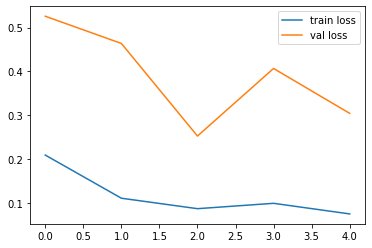

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')